In [1]:
!pip install ultralytics
import ultralytics
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Define the path to the fine-tuned model
model_path = '/content/drive/My Drive/yolov8_experiment/fine_tuned_model_final.pt'

# Load the fine-tuned model
model = YOLO(model_path)

In [7]:
# Define the path to your test images directory
test_images_dir = '/content/drive/My Drive/test/images'
test_labels_dir = '/content/drive/My Drive/test/labels'

In [9]:
# Get list of all images in the test directory
import os
test_images = [img for img in os.listdir(test_images_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

In [ ]:
# prompt: shuffle the test images and put them in random order

import random
random.shuffle(test_images)



image 1/1 /content/drive/My Drive/test/images/00e481ea1a520175_jpg.rf.6e6a8b3b45c9a11d106958f88ff714ea.jpg: 640x640 1 car, 1 bus, 7.3ms
Speed: 12.2ms preprocess, 7.3ms inference, 831.4ms postprocess per image at shape (1, 3, 640, 640)


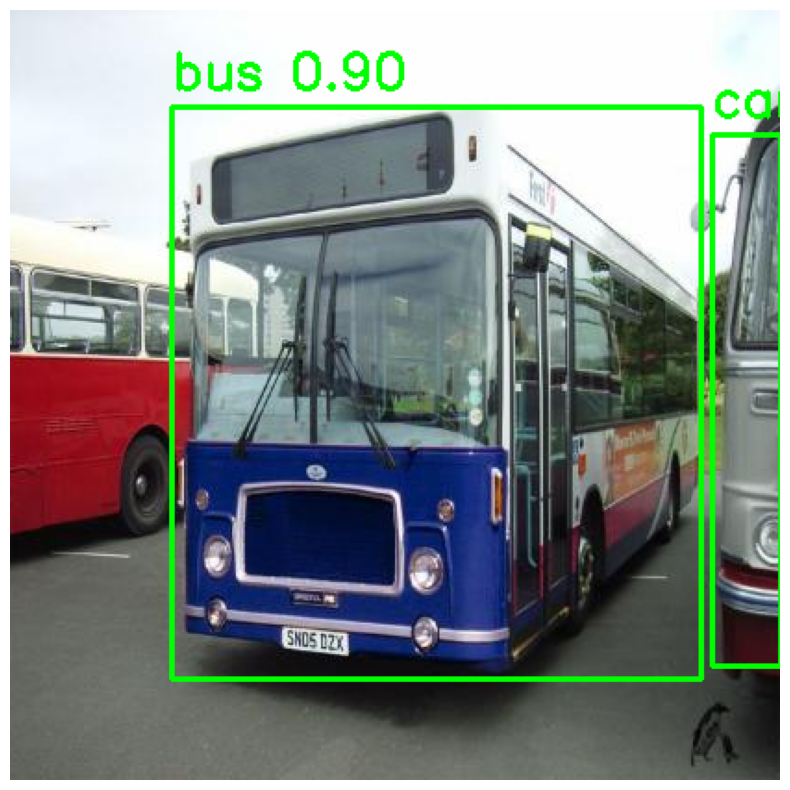


image 1/1 /content/drive/My Drive/test/images/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg: 640x640 1 car, 13.2ms
Speed: 3.9ms preprocess, 13.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


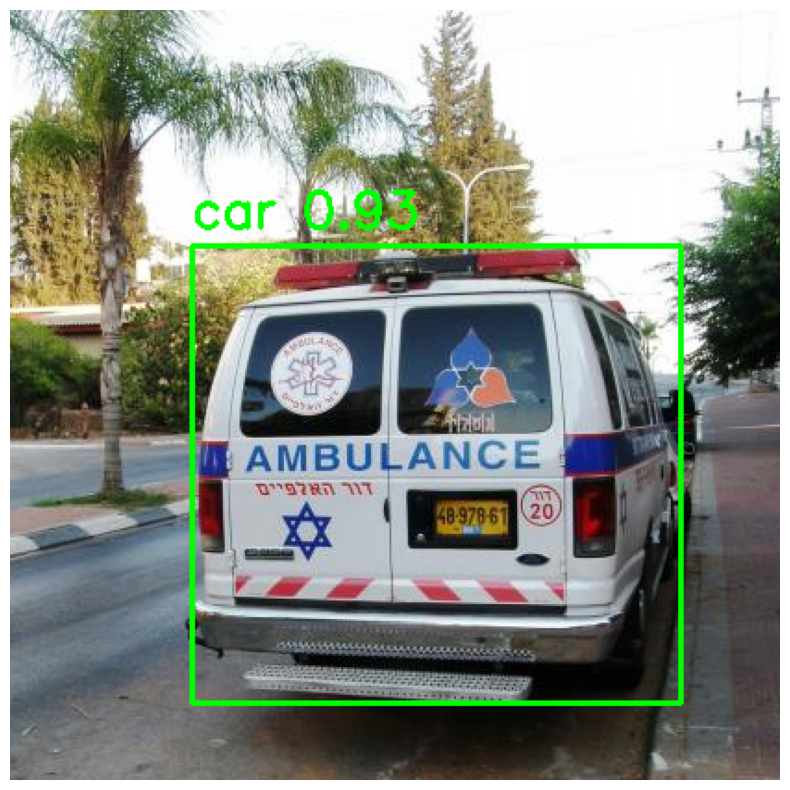


image 1/1 /content/drive/My Drive/test/images/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg: 640x640 1 car, 8.1ms
Speed: 2.8ms preprocess, 8.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


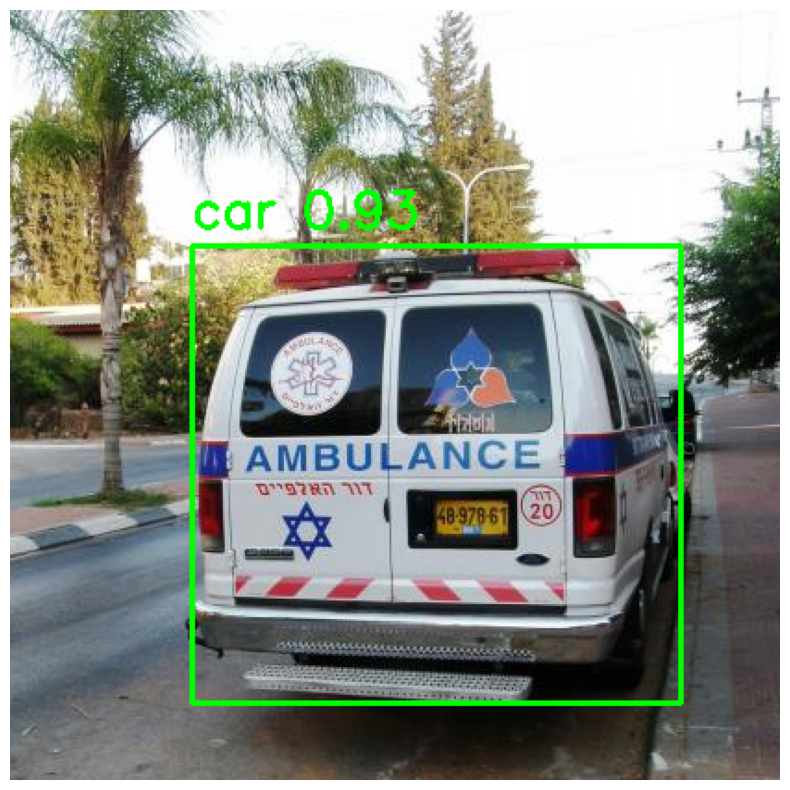


image 1/1 /content/drive/My Drive/test/images/00e481ea1a520175_jpg.rf.MV6sZ8QCFwFeMYaI2tHm.jpg: 640x640 1 car, 1 bus, 10.0ms
Speed: 4.0ms preprocess, 10.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


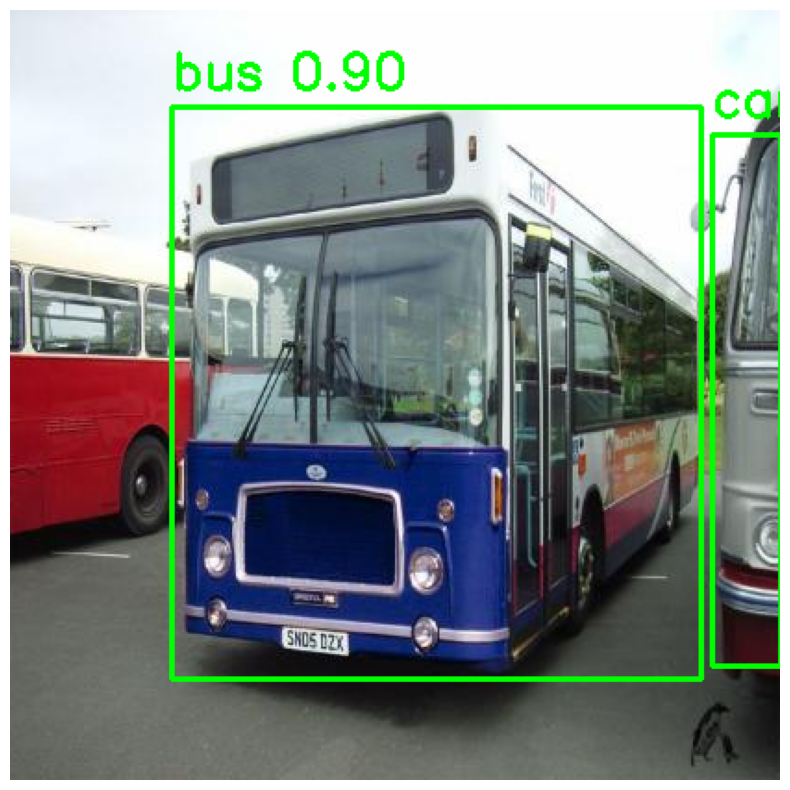


image 1/1 /content/drive/My Drive/test/images/10c26c6598677a1f_jpg.rf.USCbBYVcUICkLhuq07Lw.jpg: 640x640 1 motorcycle, 7.4ms
Speed: 2.5ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


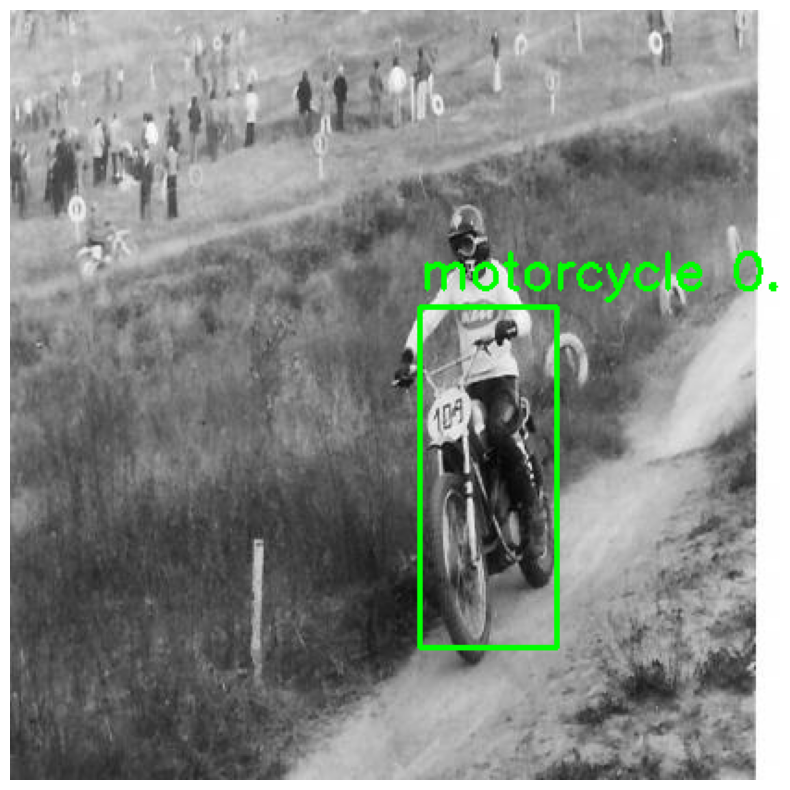


image 1/1 /content/drive/My Drive/test/images/2eaf88e3156629c6_jpg.rf.73ce41f3e4820d02eecbb00c405e6e6e.jpg: 640x640 2 others, 7.7ms
Speed: 3.6ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


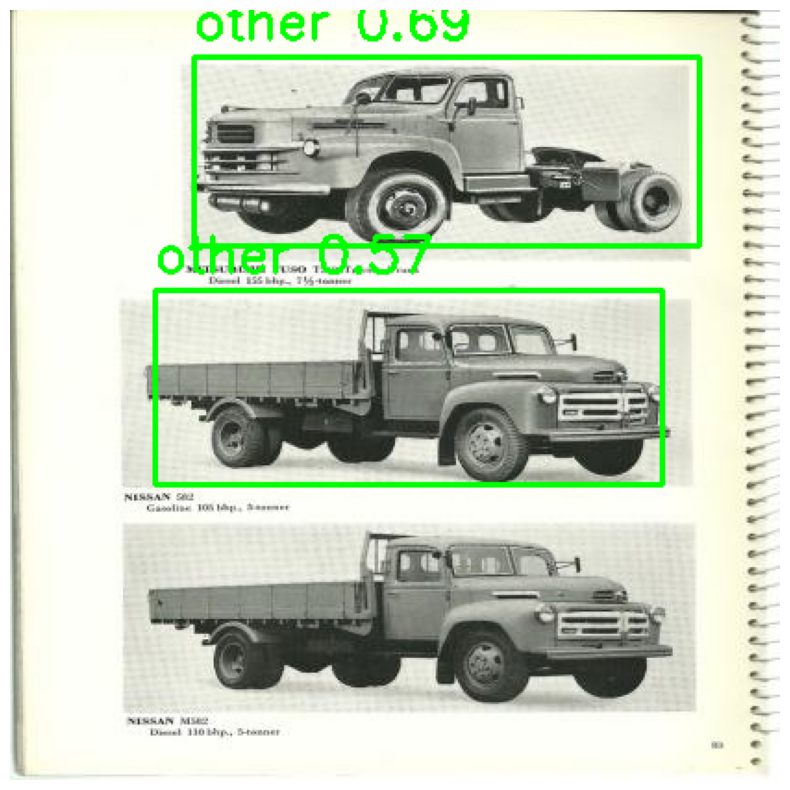


image 1/1 /content/drive/My Drive/test/images/1ef77c61856d3b4b_jpg.rf.a528f50763101224fad39907062c5026.jpg: 640x640 1 motorcycle, 7.8ms
Speed: 2.5ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:

import cv2
import matplotlib.pyplot as plt
# Function to display image with predictions
def display_image_with_predictions(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display with matplotlib

    # Run prediction on the image
    results = model(image_path)

    # Extract predictions in a format we can display
    predictions = []
    for i, bbox in enumerate(results[0].boxes.xyxy):  # Access the bounding boxes
        x1, y1, x2, y2 = map(int, bbox[:4].tolist())  # Convert to integers
        conf = results[0].boxes.conf[i].item()  # Get confidence score
        label = model.names[int(results[0].boxes.cls[i].item())]  # Get the label

        predictions.append({
            'box': [x1, y1, x2, y2],  # Bounding box coordinates
            'confidence': conf,  # Confidence score
            'label': label  # Class label
        })

    # Draw bounding boxes and labels on the image
    for pred in predictions:
        x1, y1, x2, y2 = pred['box']
        conf = pred['confidence']
        label = pred['label']

        # Draw rectangle
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Put label and confidence
        cv2.putText(img_rgb, f'{label} {conf:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the image with bounding boxes and labels
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

for image in test_images:
    image_path = os.path.join(test_images_dir, image)
    display_image_with_predictions(image_path)